In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Рассмотрим данные тестовой выборки:

In [6]:
data = pd.read_csv("test.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bodyType              3837 non-null   object 
 1   brand                 3837 non-null   object 
 2   color                 3837 non-null   object 
 3   fuelType              3837 non-null   object 
 4   modelDate             3837 non-null   float64
 5   name                  3837 non-null   object 
 6   numberOfDoors         3837 non-null   float64
 7   productionDate        3837 non-null   float64
 8   vehicleConfiguration  3837 non-null   object 
 9   vehicleTransmission   3837 non-null   object 
 10  engineDisplacement    3837 non-null   object 
 11  enginePower           3837 non-null   object 
 12  description           3837 non-null   object 
 13  mileage               3837 non-null   float64
 14  Комплектация          3837 non-null   object 
 15  Привод               

Видим, что тестовый датасет содержит **3837** записей, и **23** признака. Для более детального анализа данных используем функции: 

In [8]:
def categorical_info(column_name, data, rotate=90, x_shift_mult=0, percentage=True):
    """Рисует распределение категориальных признаков и отображает их процентное содержание"""

    ax = sns.countplot(x=column_name,
                       data=data,
                       order=data[column_name].value_counts().index, orient="h")
    if percentage:
        total = len(data[column_name])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + x_shift_mult*p.get_width()
            y = p.get_y() + p.get_height()+8
            ax.annotate(percentage, (x, y))
    plt.xticks(rotation=rotate)


def numeric_info(data, bins=10):
    """Печатает описательные статистики числового признака, а также рисует его распределение"""

    print(data.describe()[["min", "max", "25%", "50%", "75%", "std"]])
    sns.distplot(data, bins=bins)

##  bodyType  (тип кузова)

Тип кузова в датасете представлен **11** различными видами, но подавляющее большинство составляют внедорожник 5 дв. (42%) и седан (41%)

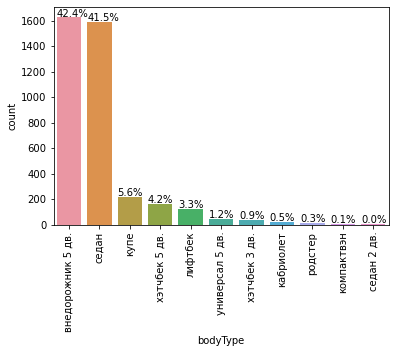

In [11]:
categorical_info("bodyType", data, rotate=90)

## brand (марка автомобиля)

In [12]:
print(
    f'Датасет полностью представлен автомобилями марки {data.brand.unique()[0]}')

Датасет полностью представлен автомобилями марки BMW


Исключим признак из расмотрения, так как он не информативен. Несмотря на это, мы получили ценную информацию для сбора данных в тренировочную выборку - это будут авто марки BMW. 

## color (цвет автомобиля)

Всего в датасете представлено **15** различных цветов. Наиболее распространёнными цветами являются черный (36%), белый (20%), синий (13%) и серый (11%)

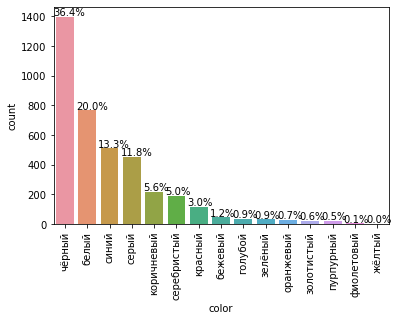

In [13]:
categorical_info("color", data, rotate=90, x_shift_mult=-1/8)

## fuelType (тип двигателя)

Датасет представлен четырьмя типами двигателей, наиболее распространённые типы - бензиновый (64%) и дизельный (35%)

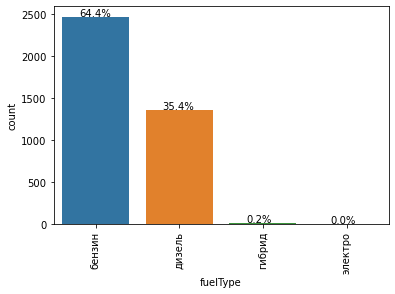

In [14]:
categorical_info("fuelType", data, rotate=90, x_shift_mult=1/4)

## modelDate (год начала выпуска модели)

Год начала выпуска модели имеет ассиметричное распределение с длинным левым концом. Производство самой старой марки началось в 1975 году, самой новой - в 2019. Первый, второй и третий квартили равны соответственно 2007, 2011 и 2014. 

min    1975.000000
max    2019.000000
25%    2007.000000
50%    2011.000000
75%    2014.000000
std       5.451623
Name: modelDate, dtype: float64


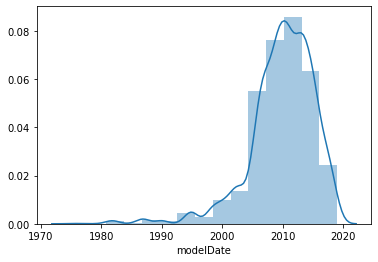

In [17]:
numeric_info(data.modelDate, bins=15)

## name (основные характеристики автомобиля)

Характерное значение этого признака: 525xi 2.5 AT (218 л.с.) 4WD

здесь 525xi - модель, 

2.5 - объем двигателя в литрах (дублирует engineDisplacement),

AT - тип трансмиссии (дублирует vehicleTransmission), 

218 - мощность двигателя в лошадиных силах (дублирует enginePower), 

4WD - тип привода (дублирует Привод). 

Так как для всех параметров, кроме модели в датасете есть дублирующие признаки, попробуем выделить только признак модели. Всего в датасете примерно 135 различных наименований моделей. Их анализ позволяет понять, что у большинства наименований первая цифра (если начинается с цифры и заканчивается буквой) означает принадлежность к серии, коих у бмв восемь (N Series). Например, 116i - первая серия, 523i - пятая. Однако некоторые начинаются просто с цифр, не заканчиваясь буквой 1.5 или 2.0, что скорее всего является объемом двигателя. 

Также имеются наименования, начинающиеся с буквы или целого слова (M135i, Competition). Что касается тех, кто начинается с буквы M, то их можно отнести к M - серии.  

In [18]:
models = []
for name in data.name:
    models.append(name.split()[0])
print(len(np.unique(models)))
np.unique(models)

135


array(['1.5', '1.5hyb', '116i', '118d', '118i', '120d', '120i', '125i',
       '130i', '135i', '18d', '18i', '2.0', '2.2', '20d', '20i', '218i',
       '220i', '23d', '23i', '25d', '25i', '28i', '3.0', '3.0d', '3.0i',
       '3.0sd', '3.0si', '30d', '30i', '316', '316i', '318d', '318i',
       '320d', '320i', '323i', '325i', '325xi', '328i', '330d', '330i',
       '330xd', '330xi', '335i', '335xi', '340i', '35d', '35i', '35is',
       '4.0', '4.4', '4.4i', '4.6is', '4.8i', '4.8is', '40d', '40i',
       '420d', '420i', '428i', '430i', '440i', '48i', '5.0', '50i', '518',
       '520Li', '520d', '520i', '523i', '525d', '525i', '525xd', '525xi',
       '528Li', '528i', '530Li', '530d', '530i', '530xd', '530xi', '535d',
       '535i', '540i', '545i', '550i', '620d', '630d', '630i', '640d',
       '640i', '645i', '650i', '725Ld', '728i', '730Ld', '730Li', '730d',
       '730i', '735Li', '735i', '740Ld', '740Li', '740d', '740i', '745Li',
       '745i', '750Ld', '750Li', '750d', '750i', '760Li

Посмотрим на распределение "подозрительных" моделей, в том смысле, что они не позволяют сразу отнести их к какой-либо серии типа (N Series). Как видим, их немного по сравнению со всем объемом выборки (5%).

In [19]:
suspicious = ['1.5', '2.0', '2.2', '3.0', '4.0', '4.4', '5.0', 'Active', 'ActiveHybrid', 'CS', 'Competition', 'Electro', 'M135i',
              'M235i', 'M340i', 'M40d', 'M40i', 'M50d', 'M50i', 'M550d', 'M550i',
              'M760Li', 'M850i', 'sDrive18i', 'xDrive18d', 'xDrive20d',
              'xDrive20i']
summa = 0
for n in suspicious:
    summa += pd.Series(models).value_counts()[n]
    print(n, pd.Series(models).value_counts()[n])

print(round(summa/len(data)*100, 2), "%")

1.5 1
2.0 1
2.2 1
3.0 12
4.0 6
4.4 88
5.0 3
Active 1
ActiveHybrid 1
CS 1
Competition 13
Electro 1
M135i 1
M235i 2
M340i 1
M40d 1
M40i 5
M50d 30
M50i 1
M550d 6
M550i 2
M760Li 4
M850i 6
sDrive18i 4
xDrive18d 1
xDrive20d 5
xDrive20i 2
5.21 %


Наконец, посмотрим, на распределение автомобилий по сериям без учета "подозрительных", включая M - серию. Видим, что наиболее распространенные модели датасета это модели 3, 5 и 2 серии. 

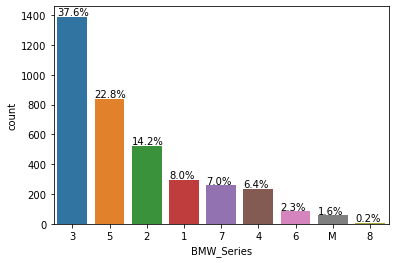

In [12]:
suspicious = ['1.5', '2.0', '2.2', '3.0', '4.0', '4.4', '5.0', 'Active', 'ActiveHybrid', 'CS', 'Competition', 'Electro',
              'sDrive18i', 'xDrive18d', 'xDrive20d',
              'xDrive20i']
models = []
for name in data.name:
    if name.split()[0] not in suspicious:
        models.append(name.split()[0][0])
series = pd.DataFrame(models, columns=["BMW_Series"])
categorical_info("BMW_Series", series, rotate=0)

## numberOfDoors (число дверей)

Большинство автомобилей имеет 5 или 4 двери, что составляет 51 и 41 % соответственно. 

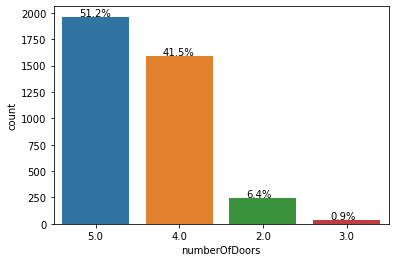

In [21]:
categorical_info("numberOfDoors", data, rotate=0, x_shift_mult=1/4)

## productionDate (год производства автомобиля)

Год производства автомобиля имеет ассиметричное распределение с длинным левым концом. Самый старый автомобиль датасета был выпущен в 1981 году, самый новый - в 2019. Первый, второй и третий квартили равны соответственно 2010, 2013 и 2016. 

min    1981.000000
max    2019.000000
25%    2010.000000
50%    2013.000000
75%    2016.000000
std       5.186576
Name: productionDate, dtype: float64


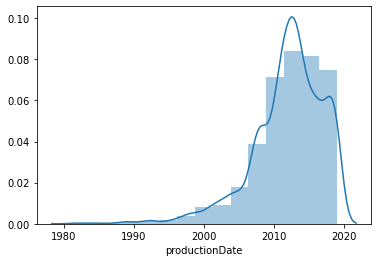

In [22]:
numeric_info(data.productionDate, bins=15)

## vehicleConfiguration (конфигурация автомобиля)

Характерное значение этого признака HATCHBACK_5_DOORS AUTOMATIC 2.0, здесь 

HATCHBACK - тип кузова (дублирует bodyType)

5_DOORS - количество дверей (указано не у всех, дублирует numberOfDoors)

AUTOMATIC - тип трансмиссии (дублирует vehicleTransmission)

2.0 - объем двигателя в литрах (дублирует engineDisplacement)

Исключим признак из расмотрения, так как он дублирует уже имеющиеся признаки, находящиеся в более удобном виде  

## vehicleTransmission (тип трансмиссии)

Подавляющее большинство автомобилей имеет автоматическую коробку передач (95.8%), механической коробкой оборудованы лишь 2.9% автомобилей, роботизированной - 1.3%. 

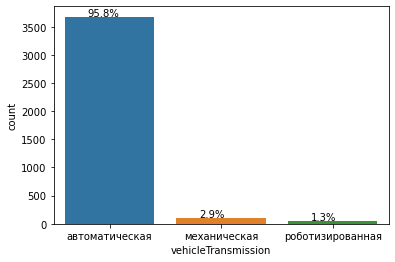

In [39]:
categorical_info("vehicleTransmission", data, rotate=0, x_shift_mult=1/4)

## engineDisplacement (объём двигателя)

Большинство двигателей автомобилей датасета имеют объем 2 литра (40%) и 3 литра (35%). Двигатели объемом 4.4, 2.5 и 1.6 литра составляют 7, 6 и 5% выборки соотвественно. Оставшиеся 6% делят между собой 16 вариантов объемов двигателей, включая один двигатель (823 строка данных) неизвестного объема (электро). 

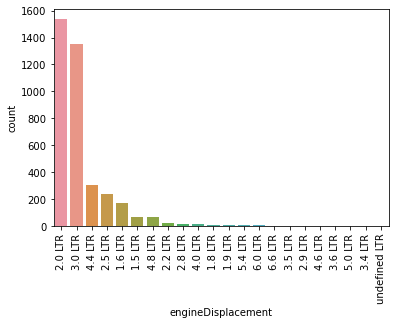

In [40]:
categorical_info("engineDisplacement", data, percentage=False)

In [41]:
for row in range(len(data)):
    if data.iloc[row].engineDisplacement == "undefined LTR":
        print(
            f'Тип двигаеля неопределенного объема: {data.iloc[row].fuelType}')

Тип двигаеля неопределенного объема: электро


In [42]:
data.engineDisplacement.value_counts(normalize=True)

2.0 LTR          0.400834
3.0 LTR          0.352619
4.4 LTR          0.079489
2.5 LTR          0.062288
1.6 LTR          0.045087
1.5 LTR          0.017201
4.8 LTR          0.016680
2.2 LTR          0.005212
2.8 LTR          0.003649
4.0 LTR          0.003388
1.8 LTR          0.002606
1.9 LTR          0.001824
5.4 LTR          0.001564
6.0 LTR          0.001303
6.6 LTR          0.001042
3.5 LTR          0.001042
2.9 LTR          0.001042
4.6 LTR          0.001042
3.6 LTR          0.000782
5.0 LTR          0.000782
3.4 LTR          0.000261
undefined LTR    0.000261
Name: engineDisplacement, dtype: float64

## enginePower (мощность двигателя)

Мощности двигателей автомобилей выборки находятся в диапазоне от 90 до 625 л.с. Первый, второй и третий квартили 
равны соответственно 184, 231 и 272 л.с. Распределение несимметрично, имеет длинный правый "хвост". В распределении признака наблюдается несколько мод: вблизи (примерно) 190, 250 и 310 л.с.

In [43]:
powers = []
for value in data.enginePower:
    powers.append(int(value.split()[0]))

min     90.000000
max    625.000000
25%    184.000000
50%    231.000000
75%    272.000000
std     91.429294
dtype: float64


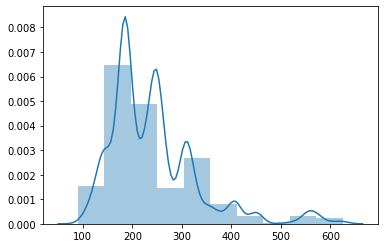

In [44]:
numeric_info(pd.Series(powers), bins=10)

## description (описание автомобиля)

Признак содержит в себе описание автомобиля, которое составил продавец. Размер описания варьируется от очень скупого "Машина собиралась под заказ!" до очень обширного, содержащего в себе очень подробное описание комплектации автомобиля. Данные во многом дублируют имеющиеся признаки в более удобном формате, такие, например, как Комплектация. Исключим признак из расмотрения.

## mileage (пробег)

Пробег автомобилей в датасете варьируется от 1 до 1000000 км. Первый, второй и третий квартили равны соответственно 58500, 108000 и 160700. Распределение признака ассиметрично, с правым "хвостом"

min          1.000000
max    1000000.000000
25%      58562.000000
50%     108000.000000
75%     160789.000000
std      85125.949826
Name: mileage, dtype: float64


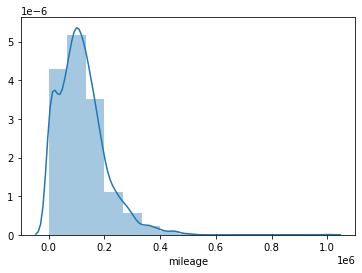

In [45]:
numeric_info(data.mileage, bins=15)

## Комплектация

Признак содержит описание комплектации автомобиля. Необходимо разобраться с парсингом данных. Сделаем это при рассмотрении данных тренировочной выборки в дальнейшем. 

In [46]:
data.Комплектация[0]

'[\'[{"name":"Безопасность","values":["Антипробуксовочная система (ASR)","Система стабилизации (ESP)","Подушка безопасности водителя","Крепление детского кресла (задний ряд) ISOFIX","Подушки безопасности оконные (шторки)","Подушка безопасности пассажира","Подушки безопасности боковые задние","Подушки безопасности боковые","Датчик давления в шинах","Антиблокировочная система (ABS)","Блокировка замков задних дверей","Подушка безопасности для защиты коленей водителя"]},{"name":"Комфорт","values":["Система «старт-стоп»","Электростеклоподъёмники передние","Мультифункциональное рулевое колесо","Прикуриватель и пепельница","Бортовой компьютер","Усилитель руля","Электропривод зеркал","Электростеклоподъёмники задние","Парктроник передний","Регулировка руля по вылету","Климат-контроль 2-зонный","Электроскладывание зеркал","Парктроник задний"]},{"name":"Мультимедиа","values":["AUX","USB","Аудиосистема","Bluetooth"]},{"name":"Обзор","values":["Датчик света","Автоматический корректор фар","Омывател

## Привод

Подавляющее большинство автомобилей датасета имеет полный привод (63.7%), на втором месте - задний привод (35.9%), предний привод составляет всего 0.4% выборки

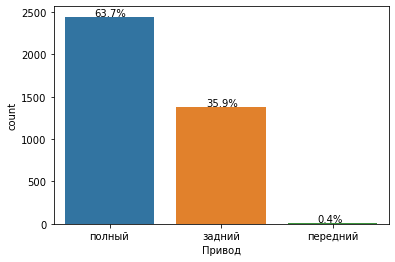

In [47]:
categorical_info("Привод", data, rotate=0, x_shift_mult=1/3)

## Руль 

In [48]:
print(
    f'Датасет полностью представлен автомобилями с типом руля: {data["Руль"].unique()[0]}')

Датасет полностью представлен автомобилями с типом руля: Левый


Не будем исключать этот признак сразу. Вдруг в тренировочной выборке будут праворульные авто. 

## Состояние

In [49]:
print(
    f'Датасет полностью представлен автомобилями с состоянием: {data["Состояние"].unique()[0]}')

Датасет полностью представлен автомобилями с состоянием: Не требует ремонта


Не будем исключать этот признак сразу. Вдруг в тренировочной выборке будут авто требующие ремонта. 

## Владельцы

Распределение числа владельцев автомобиля таково: у 39.5% авто было 3 и более владельцев, у 34.1% 1 владелец и у 26.4% - два владельца

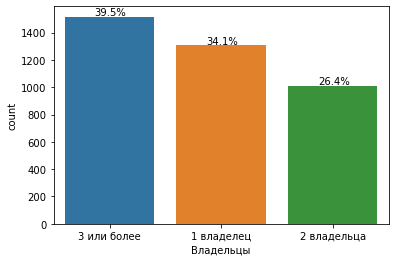

In [50]:
categorical_info("Владельцы", data, rotate=0, x_shift_mult=1/3)

## ПТС

Подавляющее число автомобилей датасета имеют оригинал птс (90.3%), дубликат птс есть у 9.7% авто

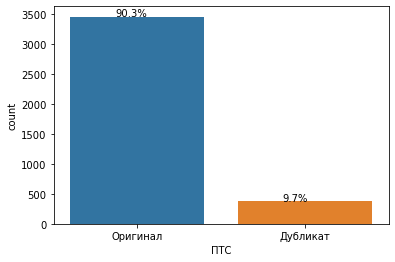

In [51]:
categorical_info("ПТС", data, rotate=0, x_shift_mult=1/3)

## Таможня

In [52]:
print(
    f'Датасет полностью представлен автомобилями с состоянием: {data["Таможня"].unique()[0]}')

Датасет полностью представлен автомобилями с состоянием: Растаможен


Не будем исключать этот признак сразу. Вдруг в тренировочной выборке будут авто требующие процедуры прохождения таможни. 

## Владение

Характерное значение признака: 1 год и 3 месяца

In [53]:
print(
    f'Признак содержит {round(100*sum(data["Владение"].isna())/len(data),1)}% пропусков, исключим его из рассмотрения')

Признак содержит 54.3% пропусков, исключим его из рассмотрения


## Id 

Признак представляет собой порядковый номер автомобиля в датасете. Неинформативный признак, исключим его из рассмотрения

## Выводы

Датасет представляет собой довольно полное описание характеристик автомобиля. Данные чистые, в большинстве своем не содержат пропусков, за исключением признака **Владение** (54% пропусков), который был исключен из рассмотрения. 

Также ввиду отсутствия информативности возможно будут исключены из дальнейшего рассмотрения признаки (если в тренировочной выборке не будет вариаций этого признака): 

**brand**, **Руль**, **Состояние**, **Таможня**, **Id**.

По причине дублирования данных, представленных в более удобном формате, исключены из рассмотрения признаки:

**vehicleConfiguration** и **description** 

Из 23 признаков были исключены 8, оставшиеся 15 предлагается использовать для моделирования. Ниже приведена сводная таблица признаков. Тип "mixed" означает смешанный тип данных. 

In [54]:
f_type = ["categorical", "categorical", "categorical", "categorical", "numeric", "mixed",
          "numeric", "numeric", "categorical", "categorical", "categorical", "numeric", "mixed",
          "numeric", "mixed", "categorical", "categorical", "categorical", "categorical",
          "categorical", "categorical", "categorical", "numeric"]

in_model = ["Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No",
            "Yes", "Yes", "Yes", "No", "No", "Yes", "Yes", "No", "No", "No"]

table = {'Feature': list(data.columns),

         'Type': f_type,

         'In_model': in_model
         }

pd.DataFrame.from_dict(table)

,Feature,Type,In_model
0,bodyType,categorical,Yes
1,brand,categorical,No
2,color,categorical,Yes
3,fuelType,categorical,Yes
4,modelDate,numeric,Yes
5,name,mixed,Yes
6,numberOfDoors,numeric,Yes
7,productionDate,numeric,Yes
8,vehicleConfiguration,categorical,No
9,vehicleTransmission,categorical,Yes


Проведённый разведовательный анализ полезен не только тем, что позволил подробно ознакомиться с датасетом, но и тем, что благодаря нему мы можем определить данные, которые будем собирать для обучения модели. 